In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
img_rows = img_cols = 28
pathToData = 'emnist/'
num_classes = 11
batch_size = 128
epochs = 15
fn_model = pathToData + 'lk3.h5'
#
pathToHistory = 'mnist/'
suff = '.txt'
# Имена файлов, в которые сохраняется история обучения 
fn_loss = pathToHistory + 'loss_' + suff
fn_acc = pathToHistory + 'acc_' + suff
fn_val_loss = pathToHistory + 'val_loss_' + suff
fn_val_acc = pathToHistory + 'val_acc_' + suff

In [4]:
def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color='r', label=lb, linestyle='--')
    plt.plot(val_loss_acc, color='g', label=lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train = np.array(x_train, dtype='float32') / 255
x_test = np.array(x_test, dtype='float32') / 255

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
def loadEmnistData(pathToData, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(pathToData + 'imagesTrain.bin', 'rb') as read_binary:
        x_train_emn = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'imagesTest.bin', 'rb') as read_binary:
        x_test_emn = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTrain.bin', 'rb') as read_binary:
        y_train_emn = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTest.bin', 'rb') as read_binary:
        y_test_emn = np.fromfile(read_binary, dtype=np.uint8)
        # Преобразование целочисленных данных в float32 и нормализация; данные лежат в диапазоне [0.0, 1.0]
    x_train_emn = np.array(x_train_emn, dtype='float32') / 255
    x_test_emn = np.array(x_test_emn, dtype='float32') / 255
    x_train_emn = x_train_emn.reshape(-1, img_rows, img_cols, 1).transpose(0, 2, 1, 3)
    x_test_emn = x_test_emn.reshape(-1, img_rows, img_cols, 1).transpose(0, 2, 1, 3)
    y_train_emn -= 1 
    y_test_emn -= 1
    return x_train_emn, y_train_emn, x_test_emn, y_test_emn

In [12]:
x_train_emn, y_train_emn, x_test_emn, y_test_emn = loadEmnistData(pathToData, img_rows, img_cols)

Загрузка данных из двоичных файлов...


In [13]:
y_train_emn[:5]

array([22,  6, 15, 14, 22], dtype=uint8)

In [14]:
print(np.argmax(y_train_emn))

14


In [15]:
y_train_emn[14]

25

In [16]:
import string
letters = list(string.ascii_uppercase)

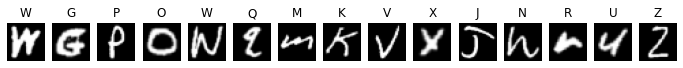

In [17]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title(letters[y_train_emn[i]])
    plt.imshow(x_train_emn[i], cmap='gray')
plt.show()

In [18]:
ind = []
for i in range(26):
    ind.append(np.where(y_train_emn == i)[0])

In [19]:
ind[0]

array([    29,     32,     35, ..., 124776, 124781, 124784], dtype=int64)

In [20]:
y_train_emn[29]

0

In [21]:
y_train_emn[35]

0

In [22]:
for i in range(20):
    ind[i] = ind[i][:231]

In [23]:
for i in range(20, 26):
    ind[i] = ind[i][:230]

In [24]:
emnist_train = []
for i in range(26):
    emnist_train.append(x_train_emn[ind[i]])

In [25]:
emnist_train[0].shape

(231, 28, 28, 1)

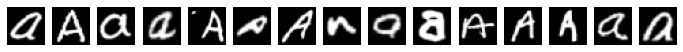

In [26]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    plt.imshow(emnist_train[0][i], cmap='gray')
plt.show()

In [27]:
ind = []
for i in range(26):
    ind.append(np.where(y_test_emn == i)[0])

In [28]:
for i in range(20):
    ind[i] = ind[i][:38]

In [29]:
for i in range(20, 26):
    ind[i] = ind[i][:40]

In [30]:
emnist_test = []
for i in range(26):
    emnist_test.append(x_test_emn[ind[i]])

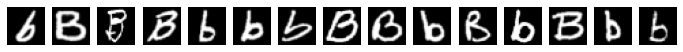

In [31]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    plt.imshow(emnist_test[1][i], cmap='gray')
plt.show()

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_train = np.append(x_train, emnist_train[0], axis = 0)

In [34]:
x_train.shape

(60231, 28, 28, 1)

In [35]:
for i in range(1, 26):
    x_train = np.append(x_train, emnist_train[i], axis = 0)

In [36]:
x_train.shape

(66000, 28, 28, 1)

In [37]:
for i in range(26):
    x_test = np.append(x_test, emnist_test[i], axis = 0)

In [38]:
x_test.shape

(11000, 28, 28, 1)

In [39]:
y_train.shape

(60000, 11)

In [40]:
y_train = np.append(y_train, [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]] * 6000, axis = 0)

In [41]:
y_train.shape

(66000, 11)

In [42]:
y_test = np.append(y_test, [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]] * 1000, axis = 0)

In [43]:
y_test.shape

(11000, 11)

In [44]:
ind = np.random.permutation(x_train.shape[0])

In [45]:
ind

array([64881,  1847, 38448, ..., 50383, 65220, 60576])

In [46]:
x_train = x_train[ind]
y_train = y_train[ind]

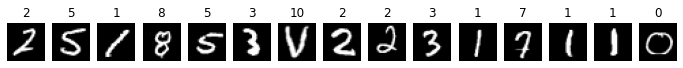

In [47]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    j = np.random.randint(0, high=x_train.shape[0], dtype=int)
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title(np.argmax(y_train[j]))
    plt.imshow(x_train[j], cmap='gray')
plt.show()

In [48]:
ind = np.random.permutation(x_test.shape[0])

In [49]:
x_test = x_test[ind]
y_test = y_test[ind]

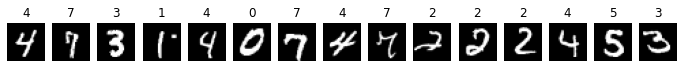

In [50]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    j = np.random.randint(0, high=x_test.shape[0], dtype=int)
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title(np.argmax(y_test[j]))
    plt.imshow(x_test[j], cmap='gray')
plt.show()

In [55]:
from keras import layers
from keras import models

In [56]:
model=models.Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())    
model.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512,activation="relu"))
    
model.add(layers.Dense(11,activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)        

In [57]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs,
                    verbose=1, validation_data = (x_test, y_test))

Train on 66000 samples, validate on 11000 samples
Epoch 1/15
50176/66000 [=====================>........] - ETA: 2:05 - loss: 0.1027 - accuracy: 0.9688

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-91926a95fd72>", line 2, in <module>
    verbose=1, validation_data = (x_test, y_test))
  File "C:\Users\user\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1239, in fit
    validation_freq=validation_freq)
  File "C:\Users\user\anaconda3\envs\gpu\lib\site-packages\keras\engine\training_arrays.py", line 196, in fit_loop
    outs = fit_function(ins_batch)
  File "C:\Users\user\anaconda3\envs\gpu\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3727, in __call__
    outputs = self._graph_fn(*converted_inputs)
  File "C:\Users\user\anaconda3\envs\gpu\lib\site-packages\tensorflow_core\python\eager\function.py", line 1551, in __call__
    return self._call_impl(args, kwargs)
  File "C:\Users\user\anaconda3\envs\gpu\lib\site-pa

In [62]:
history = history.history

with open(fn_loss, 'w') as output:
    for val in history['loss']: output.write(str(val) + '\n')
with open(fn_acc, 'w') as output:
    for val in history['accuracy']: output.write(str(val) + '\n')
with open(fn_val_loss, 'w') as output:
    for val in history['val_loss']: output.write(str(val) + '\n')
with open(fn_val_acc, 'w') as output:
    for val in history['val_accuracy']: output.write(str(val) + '\n')

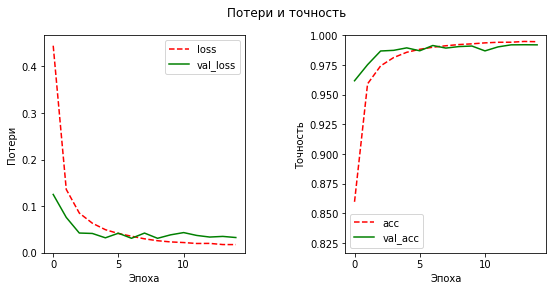

In [63]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()

In [64]:
print('Модель сохранена в файле', fn_model)
model.save(fn_model)

Модель сохранена в файле emnist/lk3.h5


In [65]:
model = models.load_model(fn_model)

In [66]:
y_test = np.argmax(y_test, axis=1)

In [67]:
y_train = np.argmax(y_train, axis=1)

In [68]:
pred_1 = model.predict(x_train)
pred_1 = np.argmax(pred_1, axis=1)

In [69]:
acc_1 = y_train[y_train == pred_1].shape[0] / y_train.shape[0]

In [70]:
print(acc_1 * 100)

99.82121212121213


In [71]:
pred_2 = model.predict(x_test)
pred_2 = np.argmax(pred_2, axis=1)

In [72]:
acc_2 = y_test[y_test == pred_2].shape[0] / y_test.shape[0]

In [73]:
print(acc_2 * 100)

99.2


In [74]:
y_test_classes = [0] * num_classes
y_test_true = [0] * num_classes
for i in range(y_test.shape[0]):
    y_test_classes[y_test[i]] += 1
    if y_test[i] == pred_2[i]:
        y_test_true[y_test[i]] += 1

In [75]:
y_test_classes

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009, 1000]

In [76]:
y_test_true

[975, 1129, 1031, 1008, 978, 875, 951, 1008, 969, 995, 993]

In [77]:
print("Test: \n")
for i in range(num_classes):
    print("acc ", i, " - ", format((y_test_true[i] * 100) / y_test_classes[i], '.2f') )

Test: 

acc  0  -  99.49
acc  1  -  99.47
acc  2  -  99.90
acc  3  -  99.80
acc  4  -  99.59
acc  5  -  98.09
acc  6  -  99.27
acc  7  -  98.05
acc  8  -  99.49
acc  9  -  98.61
acc  10  -  99.30


In [78]:
y_train_classes = [0] * num_classes
y_train_true = [0] * num_classes
for i in range(y_train.shape[0]):
    y_train_classes[y_train[i]] += 1
    if y_train[i] == pred_1[i]:
        y_train_true[y_train[i]] += 1

In [79]:
y_train_classes

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 6000]

In [80]:
y_train_true

[5922, 6718, 5956, 6124, 5834, 5400, 5911, 6239, 5843, 5937, 5998]

In [81]:
print("Train: \n")
for i in range(num_classes):
    print("acc ", i, " - ", format((y_train_true[i] * 100) / y_train_classes[i], '.2f') )

Train: 

acc  0  -  99.98
acc  1  -  99.64
acc  2  -  99.97
acc  3  -  99.89
acc  4  -  99.86
acc  5  -  99.61
acc  6  -  99.88
acc  7  -  99.58
acc  8  -  99.86
acc  9  -  99.80
acc  10  -  99.97


In [82]:
from sklearn.metrics import classification_report

In [83]:
target_names = ['Класс ' + str(cls) for cls in range(num_classes)]

In [84]:
print(classification_report(y_test, pred_2,
          target_names = target_names))

              precision    recall  f1-score   support

     Класс 0       0.99      0.99      0.99       980
     Класс 1       0.99      0.99      0.99      1135
     Класс 2       0.99      1.00      0.99      1032
     Класс 3       0.99      1.00      0.99      1010
     Класс 4       0.99      1.00      0.99       982
     Класс 5       0.99      0.98      0.99       892
     Класс 6       0.99      0.99      0.99       958
     Класс 7       1.00      0.98      0.99      1028
     Класс 8       0.99      0.99      0.99       974
     Класс 9       0.99      0.99      0.99      1009
    Класс 10       0.99      0.99      0.99      1000

    accuracy                           0.99     11000
   macro avg       0.99      0.99      0.99     11000
weighted avg       0.99      0.99      0.99     11000



In [85]:
x_train_false = x_train[np.where(pred_1 != y_train)]

In [86]:
x_train_false.shape

(118, 28, 28, 1)

In [87]:
y_train_false = y_train[np.where(pred_1 != y_train)]

In [88]:
y_train_false

array([ 4,  7,  3,  5,  9,  1,  8, 10,  7,  1,  7,  1,  1,  5,  1,  7,  1,
        1,  1,  7,  5,  8,  5,  1,  5,  6,  7,  3,  5,  5,  2,  7,  3,  1,
        6,  1,  7,  7,  7,  5,  7,  4,  7,  5,  5,  1,  5,  4,  3,  5,  1,
        7,  7, 10,  7,  8,  5,  1,  3,  5,  9,  4,  7,  9,  1,  7,  8,  8,
        9,  5,  9,  7,  9,  4,  1,  4,  8,  9,  1,  7,  6,  5,  1,  5,  7,
        1,  7,  1,  5,  6,  7,  1,  6,  6,  7,  1,  7,  5,  8,  9,  8,  5,
        3,  1,  9,  9,  5,  9,  7,  4,  9,  0,  4,  7,  6,  3,  1,  2],
      dtype=int64)

In [89]:
y_train_false.shape

(118,)

In [90]:
y_train_false_pr = pred_1[np.where(pred_1 != y_train)]

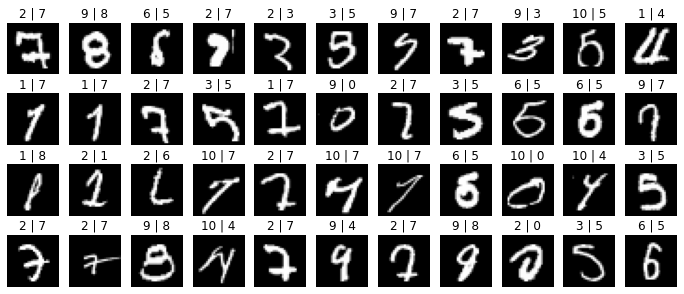

In [84]:
f = plt.figure(figsize=(12, 5))
for i in range(4):
    for j in range(11):
        sp = f.add_subplot(4, 11, j + 1 + i * 11)
        sp.axis('Off')
        sp.set_title("{} | {}".format(y_train_false_pr[i * 11 + j], y_train_false[i * 11 + j]))
        plt.imshow(x_train_false[i * 11 + j], 'gray')
plt.show()

In [91]:
x_test_false = x_test[np.where(pred_2 != y_test)]

In [92]:
x_test_false.shape

(88, 28, 28, 1)

In [93]:
y_test_false = y_test[np.where(pred_2 != y_test)]

In [94]:
y_test_false.shape

(88,)

In [95]:
y_test_false_pr = pred_2[np.where(pred_2 != y_test)]

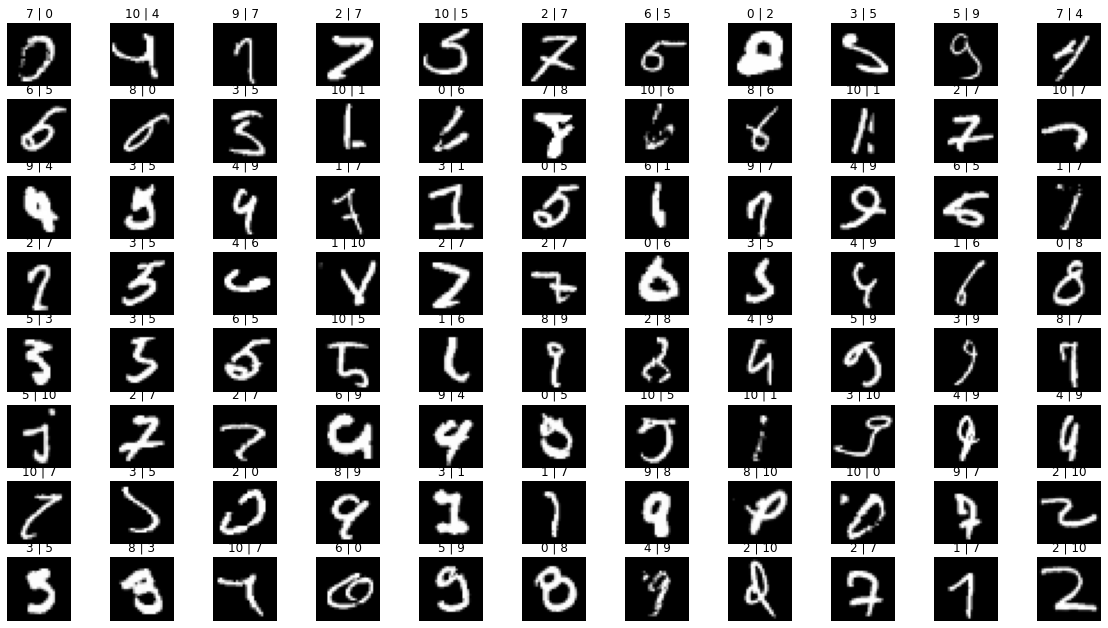

In [100]:
f = plt.figure(figsize=(20, 11))
for i in range(8):
    for j in range(11):
        sp = f.add_subplot(8, 11, j + 1 + i * 11)
        sp.axis('Off')
        sp.set_title("{} | {}".format(y_test_false_pr[i * 11 + j], y_test_false[i * 11 + j]))
        plt.imshow(x_test_false[i * 11 + j], 'gray')
plt.show()

In [101]:
ind = np.where(pred_2 != y_test)[0]

In [102]:
ind.shape

(88,)

In [103]:
cls_inds = [[0, []] for i in range(11)]

In [104]:
for i in range(x_test_false.shape[0]):
    cls_inds[y_test[ind[i]]][0] += 1
    cls_inds[y_test[ind[i]]][1].append(ind[i])

In [105]:
cls_inds

[[5, [34, 1314, 8766, 9292, 10129]],
 [6, [1742, 2407, 3216, 3302, 7965, 8981]],
 [1, [795]],
 [2, [5697, 10010]],
 [4, [143, 1100, 2779, 7940]],
 [17,
  [440,
   761,
   817,
   1256,
   1607,
   2822,
   3219,
   3848,
   4105,
   5202,
   5807,
   5829,
   5933,
   7962,
   7963,
   8734,
   10004]],
 [7, [1977, 2300, 2339, 4295, 5040, 5361, 5984]],
 [20,
  [281,
   321,
   617,
   2738,
   2778,
   3198,
   3724,
   3958,
   4066,
   4700,
   4855,
   7277,
   7762,
   7817,
   8490,
   9150,
   9790,
   10107,
   10570,
   10598]],
 [5, [2117, 5650, 6059, 9200, 10244]],
 [14,
  [846,
   3103,
   3821,
   5331,
   6029,
   6160,
   7001,
   7194,
   7878,
   8363,
   8417,
   8767,
   10134,
   10376]],
 [7, [4430, 7639, 8118, 9261, 9877, 10566, 10794]]]

In [106]:
cls_inds = sorted(cls_inds, key=lambda cls: cls[0])

In [107]:
cls_inds

[[1, [795]],
 [2, [5697, 10010]],
 [4, [143, 1100, 2779, 7940]],
 [5, [34, 1314, 8766, 9292, 10129]],
 [5, [2117, 5650, 6059, 9200, 10244]],
 [6, [1742, 2407, 3216, 3302, 7965, 8981]],
 [7, [1977, 2300, 2339, 4295, 5040, 5361, 5984]],
 [7, [4430, 7639, 8118, 9261, 9877, 10566, 10794]],
 [14,
  [846,
   3103,
   3821,
   5331,
   6029,
   6160,
   7001,
   7194,
   7878,
   8363,
   8417,
   8767,
   10134,
   10376]],
 [17,
  [440,
   761,
   817,
   1256,
   1607,
   2822,
   3219,
   3848,
   4105,
   5202,
   5807,
   5829,
   5933,
   7962,
   7963,
   8734,
   10004]],
 [20,
  [281,
   321,
   617,
   2738,
   2778,
   3198,
   3724,
   3958,
   4066,
   4700,
   4855,
   7277,
   7762,
   7817,
   8490,
   9150,
   9790,
   10107,
   10570,
   10598]]]

Класс : 2


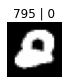

Класс : 3


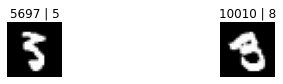

Класс : 4


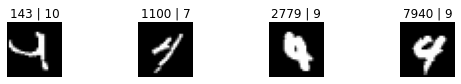

Класс : 0


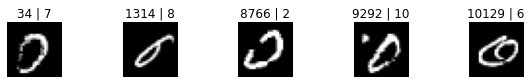

Класс : 8


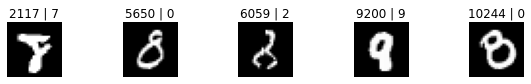

Класс : 1


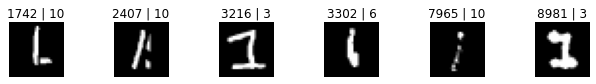

Класс : 6


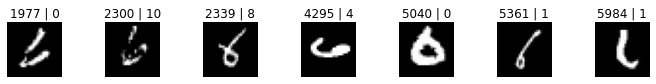

Класс : 10


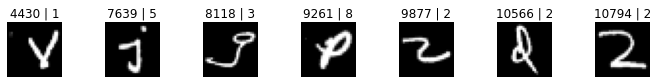

Класс : 9


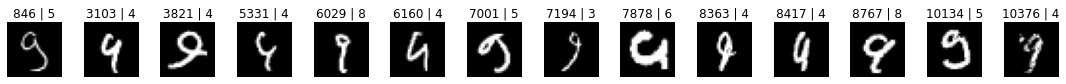

Класс : 5


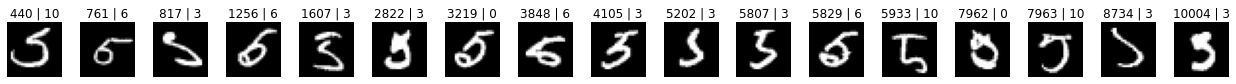

Класс : 7


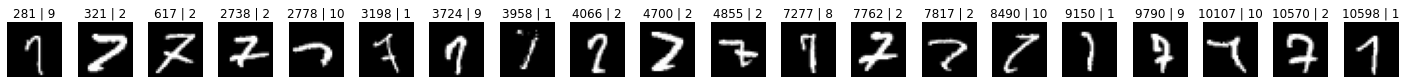

In [109]:
for i in range(11):
    print("Класс :", y_test[cls_inds[i][1][0]])
    f = plt.figure(figsize=(cls_inds[i][0] + 5, 1))
    for j in range(cls_inds[i][0]):
        sp = f.add_subplot(1, cls_inds[i][0], j + 1)
        sp.axis('Off')
        sp.set_title("{} | {}".format(cls_inds[i][1][j], pred_2[cls_inds[i][1][j]]))
        plt.imshow(x_test[cls_inds[i][1][j]], 'gray')
    plt.show()